C:\Users\admin\AppData\Local\Temp\ipykernel_7160\4158766612.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 310.11142409481937
R² Score: 0.9913685945496137


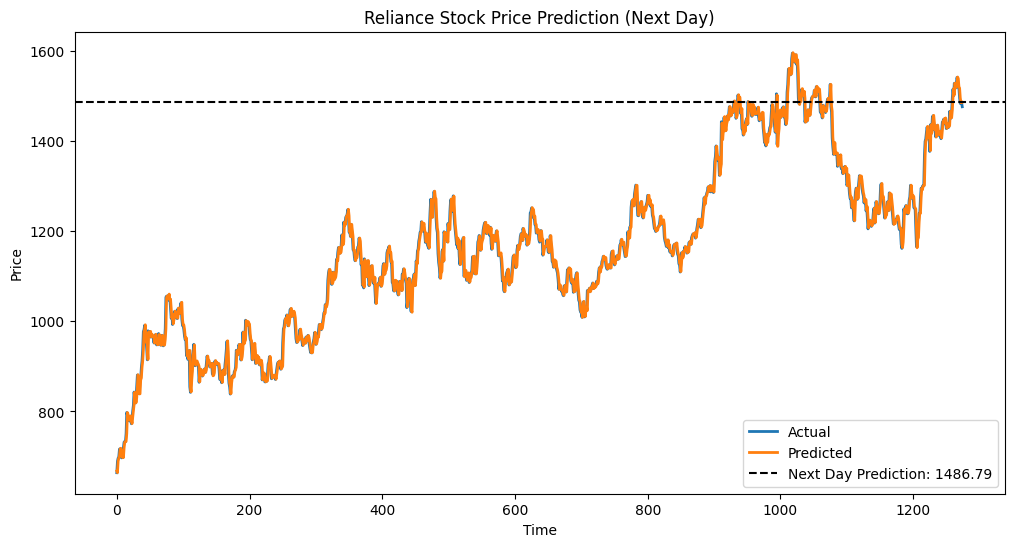

In [ ]:
# 📌 Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Step 2: Download Data
ticker = 'RELIANCE.NS'
start = '2000-01-01'
end = '2025-07-18'

df = yf.download(ticker, start=start, end=end)
df.reset_index(inplace=True)

# 📌 Step 3: Prepare Dataset
df['Target'] = df['Close'].shift(-1)  # Predict next day's close
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target']

# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 📌 Step 5: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Step 6: Prediction
y_pred = model.predict(X_test)

# 📌 Step 7: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# 📌 Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title('Reliance Stock Price Prediction (Next Day)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.axhline(y=y_pred[-1], color='black', linestyle='--', label=f'Next Day Prediction: {y_pred[-1]:.2f}')
plt.legend()
plt.savefig('images/prediction_plot.png')
plt.show()

# 📌 Step 9: Save Data
df.to_csv('data/reliance_stock_data.csv', index=False)
